## 结构化GradientDescent的案例

主要目的:

- 试验不同梯度下降优化算法

- 是否做normalization对优化算法的影响


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class TestData:
    
    def __init__(self):
        self.x1 = np.random.random(10)
        self.x2 = np.random.random(10)
        
        self.weight1 = 10
        self.weight2 = 0.5
        self.y = self.calc_y(self.weight1, self.weight2)
    
    def data_size(self):
        return len(self.x1)

    def calc_y(self, weight1, weight2):
        return self.x1 * weight1 + self.x2 * weight2
    
    def calc_loss(self, weight1, weight2):
        '''计算均方误差'''
        return np.mean(np.square(self.y - self.calc_y(weight1, weight2)))
    
    def calc_grad(self, weight1, weight2):
        '''计算均方误差损失对 weight1和 weight2 的梯度'''
        diff = self.y - self.calc_y(weight1, weight2)
        grad1 = -2 * np.sum(diff * self.x1)
        grad2 = -2 * np.sum(diff * self.x2)
        return grad1, grad2

data = TestData()

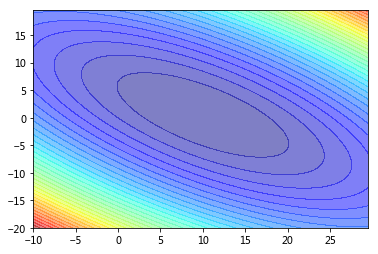

In [3]:
# 用于绘制 平方损失 的等值线
weights_1 = np.arange(-10, 30, step=0.5)
weights_2 = np.arange(-20, 20, step=0.5)

w1_grid, w2_grid = np.meshgrid(weights_1, weights_2)

loss = np.zeros((len(weights_2), len(weights_1)))

for i in range(len(weights_1)):
    for j in range(len(weights_2)):
        loss[j][i] = data.calc_loss(weights_1[i], weights_2[j])

plt.contourf(w1_grid, w2_grid, loss, 50, alpha=0.5, cmap=plt.get_cmap('jet'))

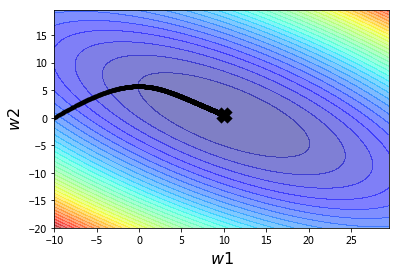

In [4]:
# 普通的梯度下降算法

lr = 1e-3   # learning rate
iteration = 100000

# store initial values for plotting
w1 = -10
w2 = 0
w1_history = [w1]
w2_history = [w2]

# iterater
for i in range(iteration):
    grad1, grad2 = data.calc_grad(w1, w2)
    # update patameters
    w1 = w1 - lr * grad1
    w2 = w2 - lr * grad2

    # store paramaters for plotting
    w1_history.append(w1)
    w2_history.append(w2)

# plot the figure
plt.contourf(w1_grid, w2_grid, loss, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([data.weight1], [data.weight2], 'X', ms=12, markeredgewidth=3, color='black')
plt.plot(w1_history, w2_history, 'o', ms=3, lw=1.5, color='black')

plt.xlabel(r'$w1$', fontsize=16)
plt.ylabel(r'$w2$', fontsize=16)
plt.show()